In [79]:
import pandas as pd
import geopandas
import numpy as np
from math import pi
from matplotlib import pyplot as plt
import seaborn as sns
import common.common_pandas_lib as common

### Configuraciones librerias

In [80]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

### Configuraciones plot

### Funciones auxiliares

#### Graficos

#### Otras funciones

In [81]:
def crear_df_precio_caracteristica_boolean(df, caracteristica):
    provincias = df["provincia"].unique()
    
    df_caracteristica_true = df[df[caracteristica] == True]
    df_caracteristica_false = df[df[caracteristica] == False]
    
    precio_caracteristica_true = df_caracteristica_true.groupby("provincia")["precio"].mean()
    precio_caracteristica_false = df_caracteristica_false.groupby("provincia")["precio"].mean()
    
    provincias_col = []
    boolean = []
    precio = []
    
    for provincia in provincias:
        #Para verdadero
        provincias_col.append(provincia)
        boolean.append(True)
        precio.append(precio_caracteristica_true[provincia])
        
        #Para falso
        provincias_col.append(provincia)
        boolean.append(False)
        precio.append(precio_caracteristica_false[provincia])
    
    dic = {"provincias": provincias_col, caracteristica: boolean, "precio": precio}
    return pd.DataFrame(dic)

### Carga optimizada del set de datos

In [82]:
df = pd.read_csv('train.csv', \
       dtype = { \
                'id' : np.int32, \

                'ciudad' : 'category', \
                'antiguedad' : np.float16, \
                'habitaciones' : np.float16, \
                'garages' : np.float16, \
                'banos' : np.float16, \
                'metroscubiertos' : np.float16, \
                'metrostotales' : np.float16, \
                'idzona' : np.float32, \
                'gimnasio' : 'bool', \
                'usosmultiples' : 'bool', \
                'piscina' : 'bool', \
                'escuelascercanas' : 'bool', \
                'centroscomercialescercanos' : 'bool', \
                'precio' : np.float32 \
               },
        parse_dates = ['fecha'],
        date_parser = pd.to_datetime                                
    )
propiedades_habitables = ["Casa", "Apartamento", "Casa en condominio", "Terreno", "Edificio", "Casa uso de suelo", "Departamento Compartido", "Quinta Vacacional", "Duplex", "Villa"]
df = df[df["tipodepropiedad"].isin(propiedades_habitables)]

# Piscinas

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en provincia:

In [83]:
n_provincia_nan = df["provincia"].isnull().sum()
n_provincia_nan

145

### Cantidad de NAN en piscina:

In [84]:
n_piscina_nan = df["piscina"].isnull().sum()
n_piscina_nan

0

In [85]:
df = df.dropna(subset=["provincia"])

## Valores

### ¿Qué valores puede tomar piscina?

In [86]:
piscina_valores = df["piscina"].unique()
piscina_valores.sort()
piscina_valores

array([False,  True])

### ¿Cuál es el promedio de piscina para una propiedad por provincia?

In [87]:
provincia_promedio_piscina = df.groupby("provincia")["piscina"].mean()

(<Figure size 1000x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b96d8bae80>)

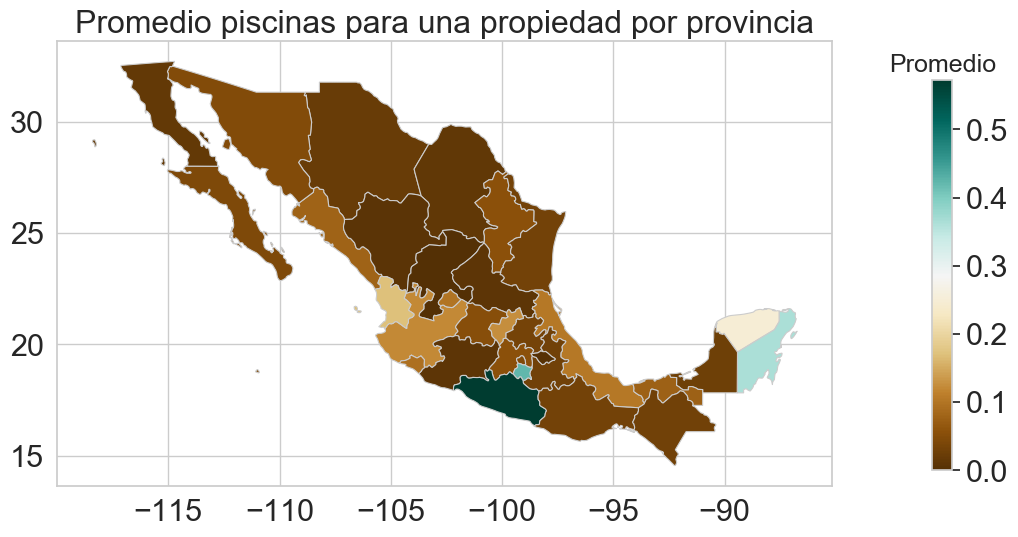

<Figure size 1250x1250 with 0 Axes>

In [88]:
common.crear_mapa(provincia_promedio_piscina, "piscina", provincia_promedio_piscina.min(),
           provincia_promedio_piscina.max(), "Promedio piscinas para una propiedad por provincia", "Promedio",
           "BrBG")

## ¿Varía en promedio el precio de las propiedades según si tienen piscinas por provincia?

In [89]:
provincias_validas = df["provincia"].value_counts() > 5000
provincias_validas = provincias_validas[provincias_validas == True]
df_reducido = df[df["provincia"].isin(list(provincias_validas.index))]

df_piscina_precio_boolean = crear_df_precio_caracteristica_boolean(df_reducido, "piscina")

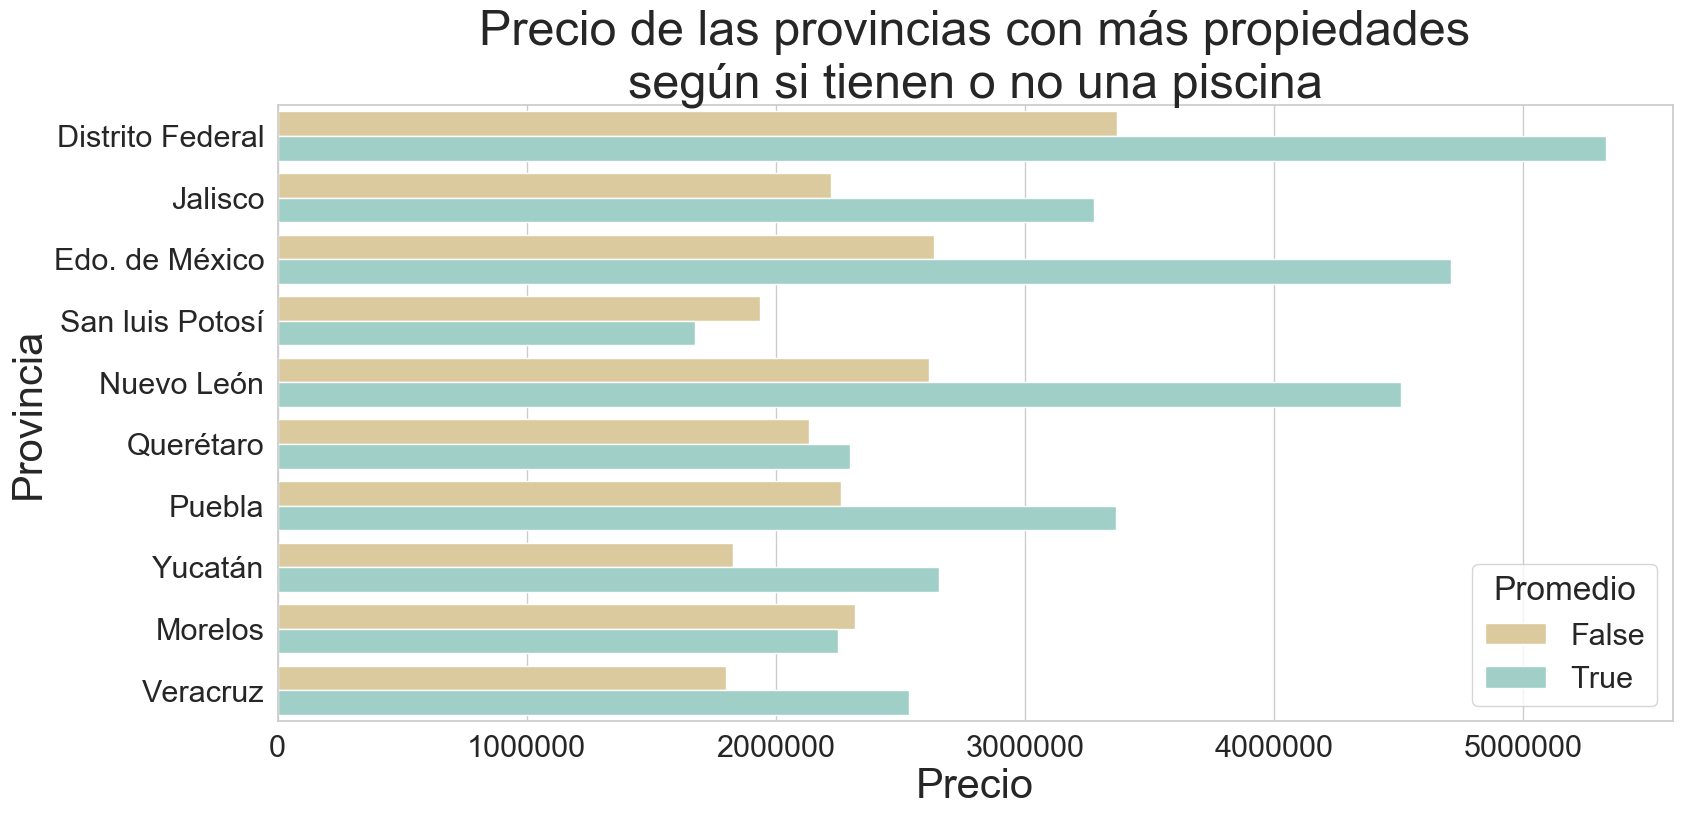

In [90]:
common.crear_plot_multiple(df_piscina_precio_boolean, "precio","provincias", "piscina", "BrBG",
           "Precio de las provincias con más propiedades\nsegún si tienen o no una piscina", "Promedio",
           "Precio", "Provincia", "h")

# Usos multiples

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en centroscomercialescercanos:

In [91]:
n_usosmultiples_nan = df["usosmultiples"].isnull().sum()
n_usosmultiples_nan

0

## Valores

### ¿Qué valores puede tomar usosmultiples?

In [92]:
usosmultiples_valores = df["usosmultiples"].unique()
usosmultiples_valores.sort()
usosmultiples_valores

array([False,  True])

### ¿Cuál es el promedio de usos multiples para una propiedad por provincia?

In [93]:
provincia_precio_usosmultiples_promedio = df.groupby("provincia")["usosmultiples"].mean()

(<Figure size 1000x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b95998feb8>)

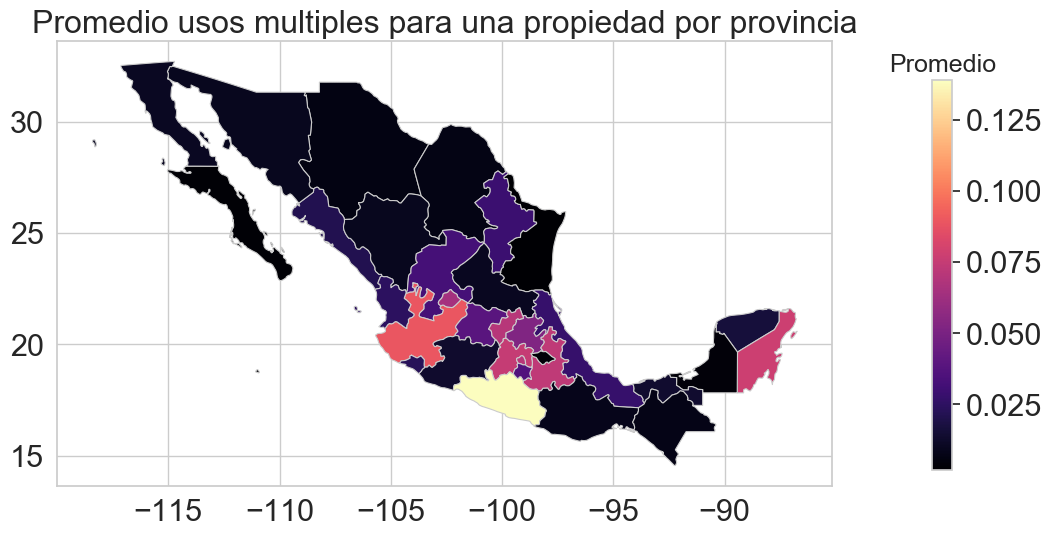

<Figure size 1250x1250 with 0 Axes>

In [94]:
common.crear_mapa(provincia_precio_usosmultiples_promedio, "usosmultiples", provincia_precio_usosmultiples_promedio.min(),
           provincia_precio_usosmultiples_promedio.max(),
           "Promedio usos multiples para una propiedad por provincia", "Promedio", "magma")

## ¿Varía en promedio el precio de las propiedades según si tienen usos multiples por provincia?

In [95]:
df_usosmultiples_precio_boolean = crear_df_precio_caracteristica_boolean(df_reducido, "usosmultiples")

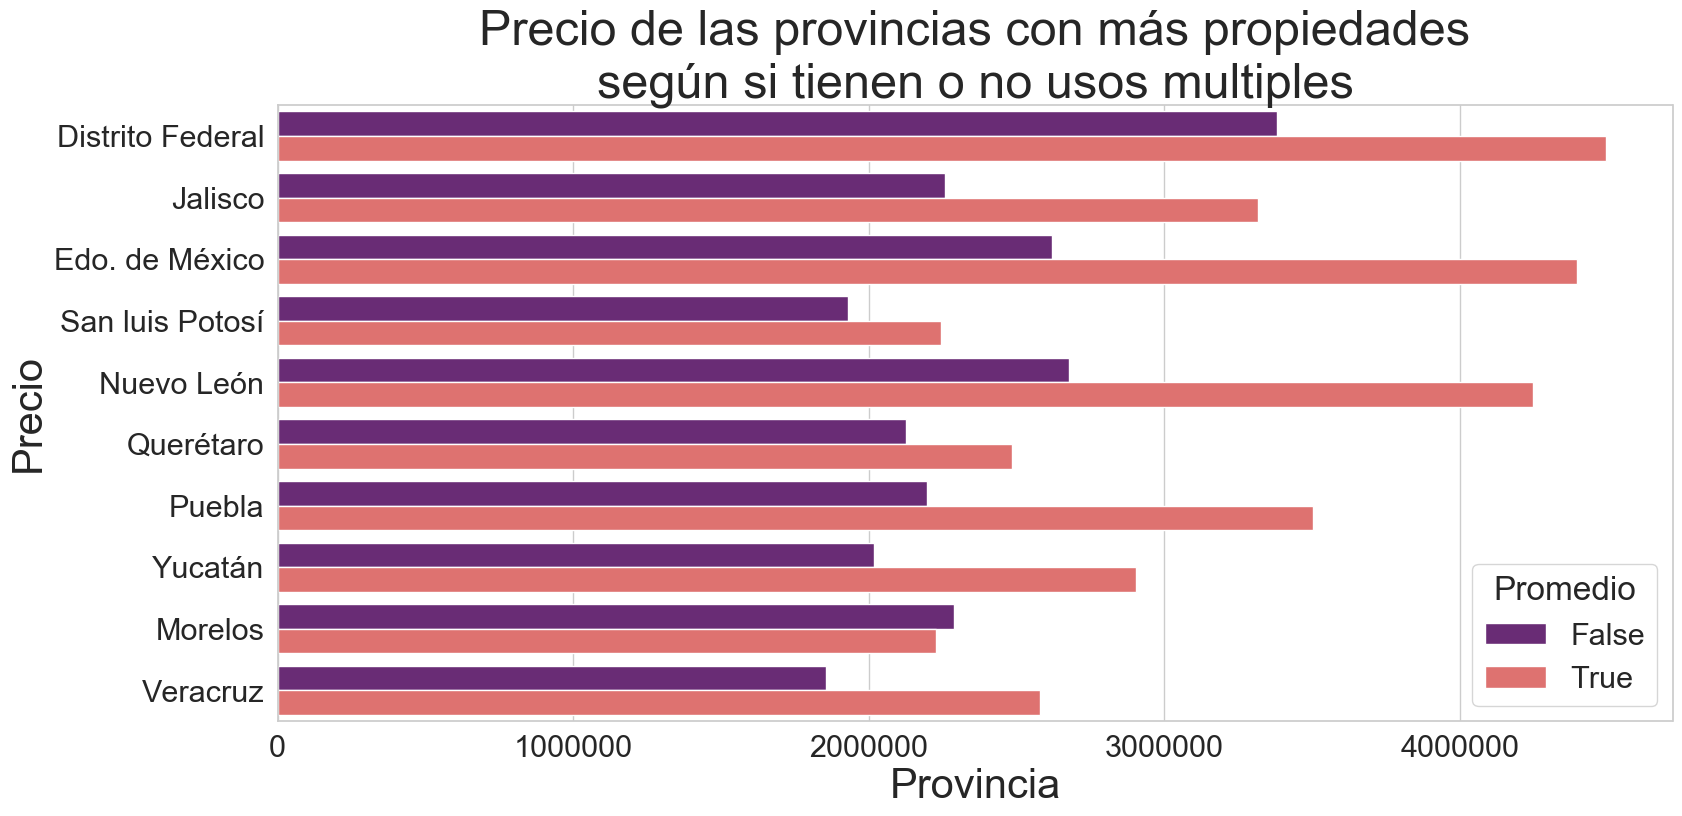

In [96]:
common.crear_plot_multiple(df_usosmultiples_precio_boolean, "precio", "provincias","usosmultiples", "magma",
           "Precio de las provincias con más propiedades\nsegún si tienen o no usos multiples",
           "Promedio", "Provincia", "Precio", "h")

# Gimnasio

## Cantidad de NAN en campos a analizar

### Cantidad de NAN en gimnasio:

In [97]:
n_gimnasio_nan = df["gimnasio"].isnull().sum()
n_gimnasio_nan

0

## Valores

### ¿Qué valores puede tomar gimansio?

In [98]:
gimnasio_valores = df["gimnasio"].unique()
gimnasio_valores.sort()
gimnasio_valores

array([False,  True])

### ¿Cuál es el promedio de gimnasios para una propiedad por provincia?

In [99]:
provincia_precio_gimnasio_promedio = df.groupby("provincia")["gimnasio"].mean()

(<Figure size 1000x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b95d22a470>)

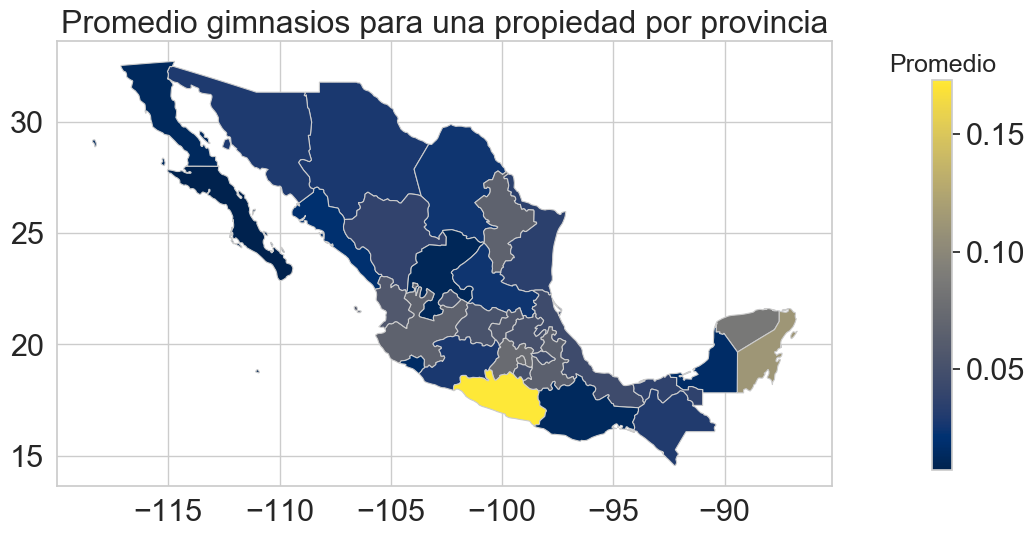

<Figure size 1250x1250 with 0 Axes>

In [100]:
common.crear_mapa(provincia_precio_gimnasio_promedio, "gimnasio", provincia_precio_gimnasio_promedio.min(),
           provincia_precio_gimnasio_promedio.max(),
           "Promedio gimnasios para una propiedad por provincia", "Promedio", "cividis")

## ¿Varía en promedio el precio de las propiedades según si tienen usos gimnasios por provincia?

In [101]:
df_gimnasio_precio_boolean = crear_df_precio_caracteristica_boolean(df_reducido, "gimnasio")

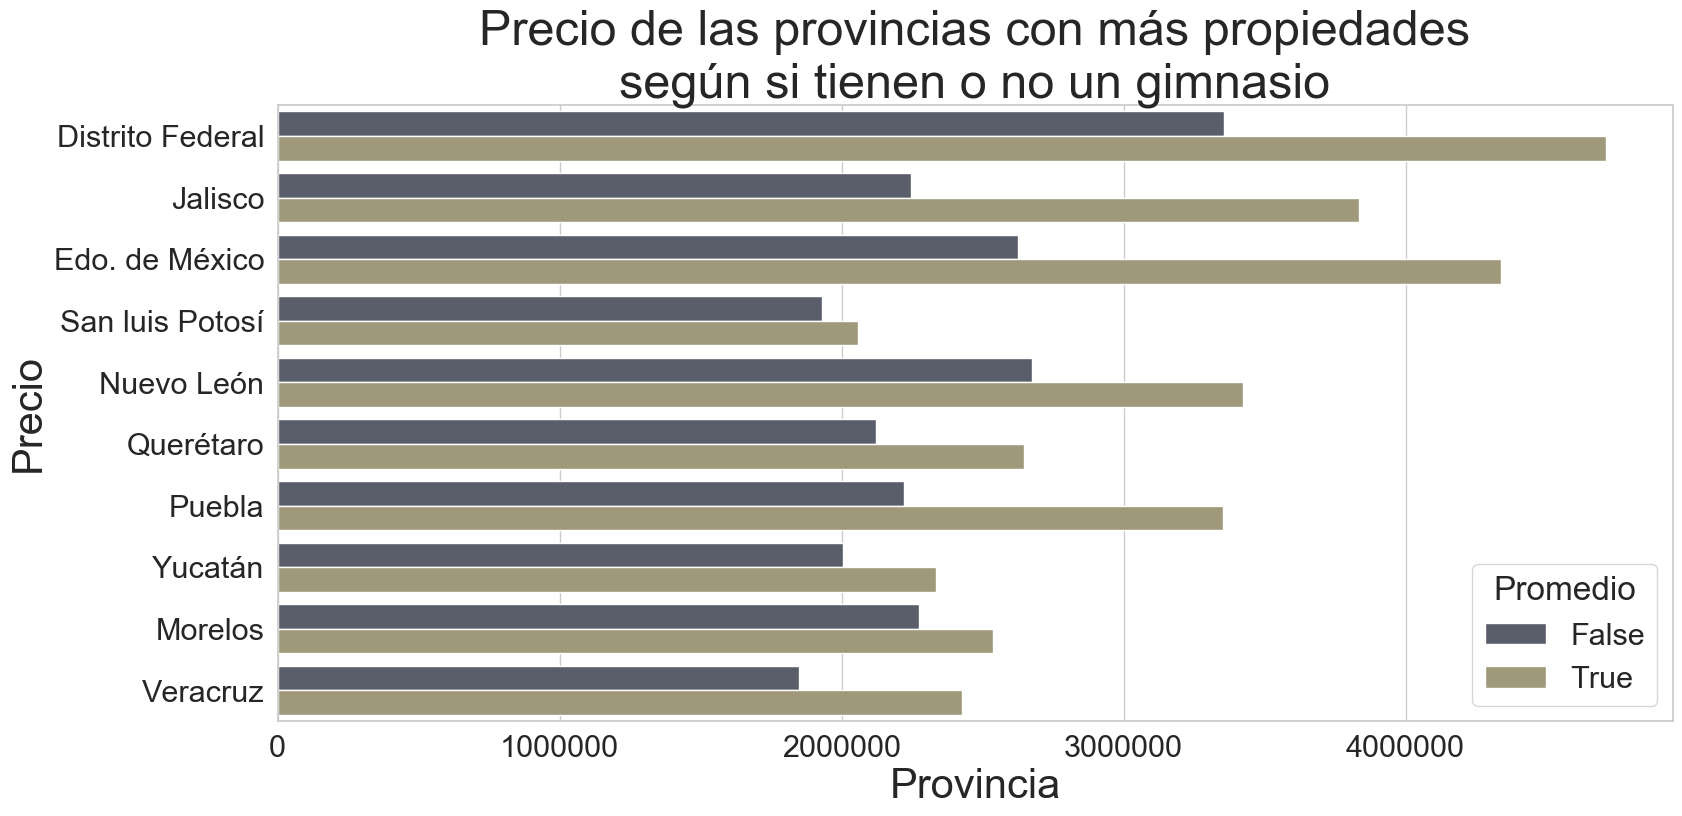

In [102]:
common.crear_plot_multiple(df_gimnasio_precio_boolean, "precio", "provincias", "gimnasio", "cividis",
           "Precio de las provincias con más propiedades\nsegún si tienen o no un gimnasio",
           "Promedio", "Provincia", "Precio", "h")